In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')

In [2]:
from utils.aux_funcs import flatten_series

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from utils.population import Population

In [5]:
savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/101921/'
# metadata_path = '/home/niell_lab/data/freely_moving_ephys/batch_files/101921/completed_experiment_pool.csv'
# pop = Population(savepath, metadata_path)
pop = Population(savepath)

In [6]:
pop.load_from_pickle(stage='population')

reading data from /home/niell_lab/data/freely_moving_ephys/batch_files/101921/pooled_ephys_population_update_102021.pickle


In [ ]:
# pop.summarize_sessions()

In [ ]:
# pop.summarize_units()

In [ ]:
# pop.save_as_pickle(stage='unit')

In [ ]:
# pop.summarize_population()

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib

In [8]:
matplotlib.rcParams.update({'font.size': 18})

In [9]:
unit = 511

In [10]:
this_session = pop.data[pop.data['session']=='070921_J553RT_control_Rig2']

In [11]:
this_unit = this_session[this_session['index']==unit]

In [16]:
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

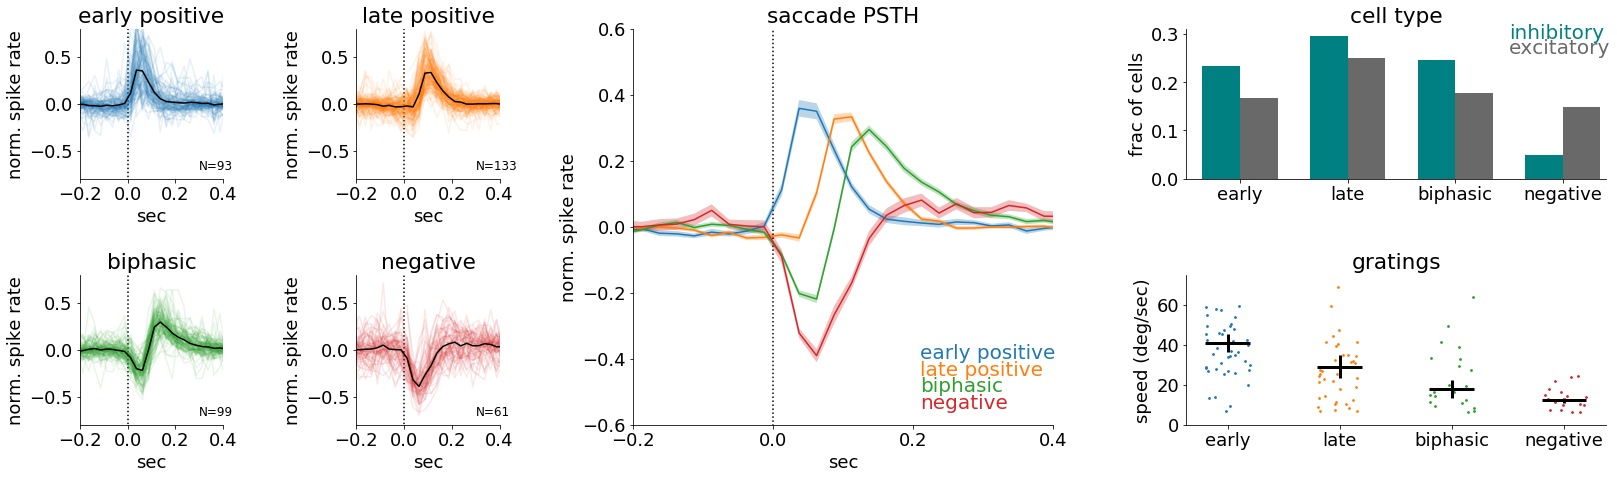

In [36]:
figure = plt.figure(constrained_layout=True, figsize=(23,7))
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=figure)

ax_early = figure.add_subplot(spec[0,0])
ax_late = figure.add_subplot(spec[0,1])
ax_biphasic = figure.add_subplot(spec[1,0])
ax_negative = figure.add_subplot(spec[1,1])
ax_all_psth = figure.add_subplot(spec[:,2:4])
ax_celltype = figure.add_subplot(spec[0,4:6])
ax_grat_speed = figure.add_subplot(spec[1,4:6])

ax_early.set_title('early positive')
all_early = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='early'])
for i in range(len(all_early)):
    ax_early.plot(pop.trange_x, all_early[i], color='tab:blue', alpha=0.1)
ax_early.set_ylabel('norm. spike rate')
ax_early.set_xlabel('sec')
ax_early.set_ylim([-0.8,0.8])
ax_early.set_xlim([-0.2,0.4])
# ax_early.axes.get_xaxis().set_visible(False)
ax_early.set_xticks(np.arange(-0.2,0.4,0.2))
ax_early.plot(pop.trange_x, np.nanmean(all_early,0), color='k')
ax_early.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_early.annotate('N='+str(len(all_early)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_late.set_title('late positive')
all_late = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='late'])
for i in range(len(all_late)):
    ax_late.plot(pop.trange_x, all_late[i], color='tab:orange', alpha=0.1)
ax_late.set_ylabel('norm. spike rate')
ax_late.set_xlabel('sec')
ax_late.set_ylim([-0.8,0.8])
ax_late.set_xlim([-0.2,0.4])
# ax_late.axes.get_xaxis().set_visible(False)
# ax_late.axes.get_yaxis().set_visible(False)
ax_late.set_xticks(np.arange(-0.2,0.4,0.2))
ax_late.plot(pop.trange_x, np.nanmean(all_late, 0), color='k')
ax_late.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_late.annotate('N='+str(len(all_late)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_biphasic.set_title('biphasic')
all_biphasic = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='biphasic'])
for i in range(len(all_biphasic)):
    ax_biphasic.plot(pop.trange_x, all_biphasic[i], color='tab:green', alpha=0.1)
ax_biphasic.set_ylabel('norm. spike rate')
ax_biphasic.set_xlabel('sec')
ax_biphasic.set_ylim([-0.8,0.8])
ax_biphasic.set_xlim([-0.2,0.4])
ax_biphasic.set_xticks(np.arange(-0.2,0.4,0.2))
ax_biphasic.plot(pop.trange_x, np.nanmean(all_biphasic,0), color='k')
ax_biphasic.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_biphasic.annotate('N='+str(len(all_biphasic)), xy=[0.3,-0.7], color='k', fontsize=12)

ax_negative.set_title('negative')
all_negative = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']=='negative'])
for i in range(len(all_negative)):
    ax_negative.plot(pop.trange_x, all_negative[i], color='tab:red', alpha=0.1)
ax_negative.set_ylabel('norm. spike rate')
ax_negative.plot(pop.trange_x, np.nanmean(all_negative,0), color='k')
ax_negative.set_xlabel('sec')
# ax_negative.axes.get_yaxis().set_visible(False)
ax_negative.set_ylim([-0.8,0.8])
ax_negative.set_xlim([-0.2,0.4])
ax_negative.set_xticks(np.arange(-0.2,0.4,0.2))
ax_negative.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_negative.annotate('N='+str(len(all_negative)), xy=[0.3,-0.7], color='k', fontsize=12)

psth_labels = ['early','late','biphasic','negative']

for count, label in enumerate(psth_labels):
    cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==label])
    cluster_mean = np.nanmean(cluster, 0)
    cluster_stderr = np.std(cluster,0) / np.sqrt(np.size(cluster,0))
    ax_all_psth.plot(pop.trange_x, cluster_mean)
    ax_all_psth.fill_between(pop.trange_x, cluster_mean-cluster_stderr, cluster_mean+cluster_stderr, alpha=0.3)
ax_all_psth.annotate('early positive', xy=[0.21,-0.4], color='tab:blue', fontsize=20)
ax_all_psth.annotate('late positive', xy=[0.21,-0.45], color='tab:orange', fontsize=20)
ax_all_psth.annotate('biphasic', xy=[0.21,-0.5], color='tab:green', fontsize=20)
ax_all_psth.annotate('negative', xy=[0.21,-0.55], color='tab:red', fontsize=20)
ax_all_psth.set_xlim([-0.2,0.4])
ax_all_psth.set_ylim([-0.6,0.6])
ax_all_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
ax_all_psth.set_title('saccade PSTH')
ax_all_psth.set_xticks(np.arange(-0.2,0.4,0.2))
ax_all_psth.set_xlabel('sec')
ax_all_psth.set_ylabel('norm. spike rate')

key_data = np.zeros([len(psth_labels),2])
for count, label in enumerate(psth_labels):
    num_inh = len(pop.data[pop.data['movement_psth_type_simple']==label][pop.data['exc_or_inh']=='inh'])
    num_exc = len(pop.data[pop.data['movement_psth_type_simple']==label][pop.data['exc_or_inh']=='exc'])
    if num_inh > 0:
        key_data[count, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
    if num_exc > 0:
        key_data[count, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])
width = 0.35
x = np.arange(len(psth_labels))
ax_celltype.bar(x-width/2, key_data[:,0], width=width, label='inhibitory', color='teal')
ax_celltype.bar(x+width/2, key_data[:,1], width=width, label='excitatory', color='dimgray')
ax_celltype.set_xticks(range(5))
ax_celltype.set_xlim([-0.5,3.4])
ax_celltype.set_xticklabels(psth_labels)
ax_celltype.set_ylabel('frac of cells')
ax_celltype.set_title('cell type')
ax_celltype.annotate('inhibitory', xy=[2.5,0.29], color='teal', fontsize=20)
ax_celltype.annotate('excitatory', xy=[2.5,0.26], color='dimgray', fontsize=20)

for count, label in enumerate(psth_labels):
    grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==label][pop.data['responsive_to_gratings']]
    mean = np.nanmedian(grat_speed,0)
    stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
    lbound = count-0.2; ubound = count+0.2
    x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
    ax_grat_speed.scatter(x_jitter, grat_speed, s=3)
    ax_grat_speed.hlines(mean, lbound, ubound, linewidth=3)
    ax_grat_speed.vlines(count, mean-stderr, mean+stderr, linewidth=3)
ax_grat_speed.set_ylim([0,75])
ax_grat_speed.set_xticks(range(len(psth_labels)))
ax_grat_speed.set_xticklabels(psth_labels)
ax_grat_speed.set_title('gratings')
ax_grat_speed.set_ylabel('speed (deg/sec)')

figure.tight_layout(h_pad=1.5, w_pad=2.25)

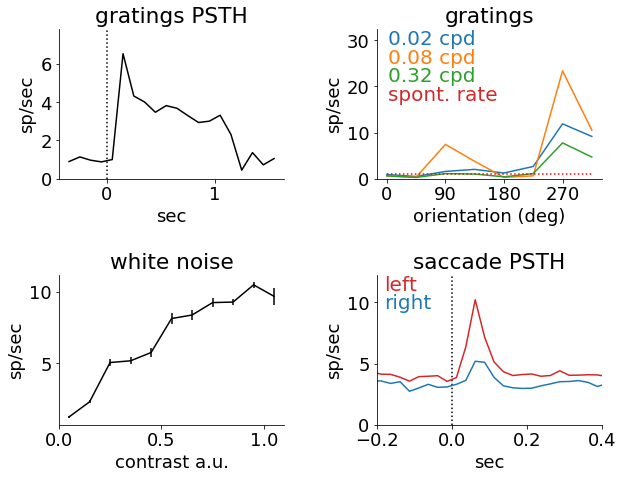

In [40]:
figure = plt.figure(constrained_layout=True,figsize=(9,7))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=figure)

ax_grat_psth = figure.add_subplot(spec[0,0])
ax_grat_ori = figure.add_subplot(spec[0,1])
ax_contrast = figure.add_subplot(spec[1,0])
ax_eye_psth = figure.add_subplot(spec[1,1])

rightavg = this_unit['fm1_upsacc_avg_gaze_shift_dEye'].iloc[0]
leftavg = this_unit['fm1_downsacc_avg_gaze_shift_dEye'].iloc[0]
ax_eye_psth.plot(pop.trange_x, rightavg, color='tab:blue')
ax_eye_psth.plot(pop.trange_x, leftavg, color='tab:red')
ax_eye_psth.set_ylim([0, np.max(np.maximum(rightavg, leftavg))*1.2])
ax_eye_psth.set_xlim([-0.2,0.4])
ax_eye_psth.set_xticks(np.arange(-0.2,0.4,0.2))
ax_eye_psth.set_title('saccade PSTH')
ax_eye_psth.vlines(0, 0, np.max(np.maximum(rightavg, leftavg))*1.5, linestyles='dotted', colors='k')
ax_eye_psth.set_ylabel('sp/sec')
ax_eye_psth.set_xlabel('sec')
ax_eye_psth.annotate('right', xy=[-.18,9.5], color='tab:blue', fontsize=20)
ax_eye_psth.annotate('left', xy=[-.18,11], color='tab:red', fontsize=20)

ax_contrast.set_title('white noise')
ax_contrast.errorbar(this_unit['hf1_wn_crf_cent'].iloc[0], this_unit['hf1_wn_crf_tuning'].iloc[0], yerr=this_unit['hf1_wn_crf_err'].iloc[0], color='k')
ax_contrast.set_xlabel('contrast a.u.')
ax_contrast.set_ylabel('sp/sec')

lower = -0.5; upper = 1.5; dt = 0.1
bins = np.arange(lower, upper+dt, dt)
psth = this_unit['hf3_gratings_grating_psth'].iloc[0]
ax_grat_psth.plot(bins[1:]+dt/2, psth, color='k')
ax_grat_psth.set_title('gratings PSTH')
ax_grat_psth.set_xlabel('sec')
ax_grat_psth.set_ylabel('sp/sec')
ax_grat_psth.set_ylim([0,np.nanmax(psth)*1.2])
ax_grat_psth.vlines(0, 0, np.nanmax(psth)*1.5, linestyles='dotted', colors='k')

raw_tuning = np.mean(this_unit['hf3_gratings_ori_tuning'].iloc[0],2)
drift_spont = this_unit['hf3_gratings_drift_spont'].iloc[0]
ax_grat_ori.plot(np.arange(8)*45, raw_tuning[:,0], label='', color='tab:blue')
ax_grat_ori.plot(np.arange(8)*45, raw_tuning[:,1], label='0.08 cpd', color='tab:orange')
ax_grat_ori.plot(np.arange(8)*45, raw_tuning[:,2], label='0.32 cpd', color='tab:green')
ax_grat_ori.annotate('0.02 cpd', xy=[2,29], color='tab:blue', fontsize=20)
ax_grat_ori.annotate('0.08 cpd', xy=[2,25], color='tab:orange', fontsize=20)
ax_grat_ori.annotate('0.32 cpd', xy=[2,21], color='tab:green', fontsize=20)
ax_grat_ori.annotate('spont. rate', xy=[2,17], color='tab:red', fontsize=20)
ax_grat_ori.plot([0,315], [drift_spont, drift_spont],'r:')
ax_grat_ori.set_title('gratings')
ax_grat_ori.set_ylabel('sp/sec')
ax_grat_ori.set_xlabel('orientation (deg)')
ax_grat_ori.set_xticks([0,90,180,270])
ax_grat_ori.set_ylim([0,np.nanmax(this_unit['hf3_gratings_ori_tuning'].iloc[0])*1.2])
figure.tight_layout(h_pad=1.5, w_pad=2.25)

In [ ]:
plt.plot((bins[1:]+dt/2), psth)
plt.vlines(0,0,7)

In [ ]:
len(pop.data['session'].unique())

In [ ]:
(bins[1:]+dt/2)

In [ ]:
figure = plt.figure(constrained_layout=True, figsize=(35,15))
spec = gridspec.GridSpec(ncols=15, nrows=4, figure=figure)
biphasic_gaze_psth = figure.add_subplot(spec[0,0:2])
biphasic_comp_psth = figure.add_subplot(spec[0,2:4])
biphasic_dark_gaze_psth = figure.add_subplot(spec[0,4:6])
biphasic_dark_comp_psth = figure.add_subplot(spec[0,6:8])
biphasic_grat_speed = figure.add_subplot(spec[0,8])
biphasic_celltype = figure.add_subplot(spec[0,9:10])
biphasic_gyro = figure.add_subplot(spec[0,10:13])
biphasic_eye = figure.add_subplot(spec[0,13:15])

cluster_name = 'biphasic'

cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    biphasic_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
biphasic_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
biphasic_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
biphasic_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
biphasic_gaze_psth.set_title('gaze-shifting')

cluster = flatten_series(pop.data['norm_deflection_at_opp_direction_comp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    biphasic_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
biphasic_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
biphasic_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
biphasic_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
biphasic_comp_psth.set_title('compensatory')

cluster = flatten_series(pop.data['dark_gaze_shift_using_light_direction_pref'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    biphasic_dark_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
biphasic_dark_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
biphasic_dark_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
biphasic_dark_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
biphasic_dark_gaze_psth.set_title('dark gaze-shifting')

cluster = flatten_series(pop.data['dark_comp_using_light_direction_opp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    biphasic_dark_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
biphasic_dark_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
biphasic_dark_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
biphasic_dark_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
biphasic_dark_comp_psth.set_title('dark compensatory')

grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==cluster_name][pop.data['responsive_to_gratings']]
mean = np.nanmean(grat_speed,0)
stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
lbound = 0-0.05; ubound = 0+0.05
x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
biphasic_grat_speed.scatter(x_jitter, grat_speed, s=3)
biphasic_grat_speed.hlines(mean, lbound, ubound, linewidth=5)
biphasic_grat_speed.vlines(0, mean-stderr, mean+stderr, linewidth=5)
biphasic_grat_speed.set_ylim([0,140])
biphasic_grat_speed.set_xticks([])
biphasic_grat_speed.set_xlim([-0.1,0.1])
biphasic_grat_speed.set_ylabel('pref speed of hf gratings (deg/sec)')

num_inh = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='inh'])
num_exc = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='exc'])
key_data = np.zeros([1,2])
if num_inh > 0:
    key_data[0, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
if num_exc > 0:
    key_data[0, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])           
width = 0.35
biphasic_celltype.bar(0 - width/2, key_data[:,0], width=width, label='inhibitory', color='g')
biphasic_celltype.bar(0 + width/2, key_data[:,1], width=width, label='excitatory', color='b')
biphasic_celltype.set_xticks([])
biphasic_celltype.set_xlim([-0.5,0.5])
biphasic_celltype.set_xticklabels([])
biphasic_celltype.legend()

light_gyro_x = pop.data['fm1_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_x = pop.data['fm_dark_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_y = pop.data['fm1_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_y = pop.data['fm_dark_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_z = pop.data['fm1_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_z = pop.data['fm_dark_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_gyro_x, dark_gyro_x, light_gyro_y, dark_gyro_y, light_gyro_z, dark_gyro_z]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    biphasic_gyro.scatter(x_jitter, modind, s=3)
    biphasic_gyro.hlines(mean, lbound, ubound, linewidth=5)
    biphasic_gyro.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    biphasic_gyro.set_ylim([0,1])
    biphasic_gyro.set_xticks(range(7))
    biphasic_gyro.set_xticklabels(['light x','dark x','light y','dark y','light z','dark z'])
    biphasic_gyro.set_ylabel('gyro modulation')
    
light_th = pop.data['fm1_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_th = pop.data['fm_dark_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_phi = pop.data['fm1_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_phi = pop.data['fm_dark_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_th, dark_th, light_phi, dark_phi]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    biphasic_eye.scatter(x_jitter, modind, s=3)
    biphasic_eye.hlines(mean, lbound, ubound, linewidth=5)
    biphasic_eye.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    biphasic_eye.set_ylim([0,1])
    biphasic_eye.set_xticks(range(5))
    biphasic_eye.set_xticklabels(['light theta','dark theta','light phi','dark phi'])
    biphasic_eye.set_ylabel('eye position modulation')

early_gaze_psth = figure.add_subplot(spec[1,0:2])
early_comp_psth = figure.add_subplot(spec[1,2:4])
early_dark_gaze_psth = figure.add_subplot(spec[1,4:6])
early_dark_comp_psth = figure.add_subplot(spec[1,6:8])
early_grat_speed = figure.add_subplot(spec[1,8])
early_celltype = figure.add_subplot(spec[1,9:10])
early_gyro = figure.add_subplot(spec[1,10:13])
early_eye = figure.add_subplot(spec[1,13:15])

cluster_name = 'early'

cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    early_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
early_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
early_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
early_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
early_gaze_psth.set_title('gaze-shifting')

cluster = flatten_series(pop.data['norm_deflection_at_opp_direction_comp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    early_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
early_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
early_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
early_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
early_comp_psth.set_title('compensatory')

cluster = flatten_series(pop.data['dark_gaze_shift_using_light_direction_pref'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    early_dark_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
early_dark_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
early_dark_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
early_dark_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
early_dark_gaze_psth.set_title('dark gaze-shifting')

cluster = flatten_series(pop.data['dark_comp_using_light_direction_opp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    early_dark_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
early_dark_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
early_dark_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
early_dark_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
early_dark_comp_psth.set_title('dark compensatory')

grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==cluster_name][pop.data['responsive_to_gratings']]
mean = np.nanmean(grat_speed,0)
stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
lbound = 0-0.05; ubound = 0+0.05
x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
early_grat_speed.scatter(x_jitter, grat_speed, s=3)
early_grat_speed.hlines(mean, lbound, ubound, linewidth=5)
early_grat_speed.vlines(0, mean-stderr, mean+stderr, linewidth=5)
early_grat_speed.set_ylim([0,140])
early_grat_speed.set_xticks([])
early_grat_speed.set_xlim([-0.1,0.1])
early_grat_speed.set_ylabel('pref speed of hf gratings (deg/sec)')

num_inh = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='inh'])
num_exc = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='exc'])
key_data = np.zeros([1,2])
if num_inh > 0:
    key_data[0, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
if num_exc > 0:
    key_data[0, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])           
width = 0.35
early_celltype.bar(0 - width/2, key_data[:,0], width=width, label='inhibitory', color='g')
early_celltype.bar(0 + width/2, key_data[:,1], width=width, label='excitatory', color='b')
early_celltype.set_xticks([])
early_celltype.set_xlim([-0.5,0.5])
early_celltype.set_xticklabels([])
early_celltype.legend()

light_gyro_x = pop.data['fm1_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_x = pop.data['fm_dark_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_y = pop.data['fm1_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_y = pop.data['fm_dark_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_z = pop.data['fm1_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_z = pop.data['fm_dark_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_gyro_x, dark_gyro_x, light_gyro_y, dark_gyro_y, light_gyro_z, dark_gyro_z]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    early_gyro.scatter(x_jitter, modind, s=3)
    early_gyro.hlines(mean, lbound, ubound, linewidth=5)
    early_gyro.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    early_gyro.set_ylim([0,1])
    early_gyro.set_xticks(range(7))
    early_gyro.set_xticklabels(['light x','dark x','light y','dark y','light z','dark z'])
    early_gyro.set_ylabel('gyro modulation')
    
light_th = pop.data['fm1_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_th = pop.data['fm_dark_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_phi = pop.data['fm1_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_phi = pop.data['fm_dark_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_th, dark_th, light_phi, dark_phi]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    early_eye.scatter(x_jitter, modind, s=3)
    early_eye.hlines(mean, lbound, ubound, linewidth=5)
    early_eye.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    early_eye.set_ylim([0,1])
    early_eye.set_xticks(range(5))
    early_eye.set_xticklabels(['light theta','dark theta','light phi','dark phi'])
    early_eye.set_ylabel('eye position modulation')
    
late_gaze_psth = figure.add_subplot(spec[2,0:2])
late_comp_psth = figure.add_subplot(spec[2,2:4])
late_dark_gaze_psth = figure.add_subplot(spec[2,4:6])
late_dark_comp_psth = figure.add_subplot(spec[2,6:8])
late_grat_speed = figure.add_subplot(spec[2,8])
late_celltype = figure.add_subplot(spec[2,9:10])
late_gyro = figure.add_subplot(spec[2,10:13])
late_eye = figure.add_subplot(spec[2,13:15])

cluster_name = 'late'

cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    late_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
late_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
late_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
late_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
late_gaze_psth.set_title('gaze-shifting')

cluster = flatten_series(pop.data['norm_deflection_at_opp_direction_comp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    late_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
late_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
late_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
late_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
late_comp_psth.set_title('compensatory')

cluster = flatten_series(pop.data['dark_gaze_shift_using_light_direction_pref'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    late_dark_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
late_dark_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
late_dark_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
late_dark_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
late_dark_gaze_psth.set_title('dark gaze-shifting')

cluster = flatten_series(pop.data['dark_comp_using_light_direction_opp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    late_dark_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
late_dark_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
late_dark_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
late_dark_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
late_dark_comp_psth.set_title('dark compensatory')

grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==cluster_name][pop.data['responsive_to_gratings']]
mean = np.nanmean(grat_speed,0)
stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
lbound = 0-0.05; ubound = 0+0.05
x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
late_grat_speed.scatter(x_jitter, grat_speed, s=3)
late_grat_speed.hlines(mean, lbound, ubound, linewidth=5)
late_grat_speed.vlines(0, mean-stderr, mean+stderr, linewidth=5)
late_grat_speed.set_ylim([0,140])
late_grat_speed.set_xticks([])
late_grat_speed.set_xlim([-0.1,0.1])
late_grat_speed.set_ylabel('pref speed of hf gratings (deg/sec)')

num_inh = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='inh'])
num_exc = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='exc'])
key_data = np.zeros([1,2])
if num_inh > 0:
    key_data[0, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
if num_exc > 0:
    key_data[0, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])           
width = 0.35
late_celltype.bar(0 - width/2, key_data[:,0], width=width, label='inhibitory', color='g')
late_celltype.bar(0 + width/2, key_data[:,1], width=width, label='excitatory', color='b')
late_celltype.set_xticks([])
late_celltype.set_xlim([-0.5,0.5])
late_celltype.set_xticklabels([])
late_celltype.legend()

light_gyro_x = pop.data['fm1_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_x = pop.data['fm_dark_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_y = pop.data['fm1_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_y = pop.data['fm_dark_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_z = pop.data['fm1_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_z = pop.data['fm_dark_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_gyro_x, dark_gyro_x, light_gyro_y, dark_gyro_y, light_gyro_z, dark_gyro_z]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    late_gyro.scatter(x_jitter, modind, s=3)
    late_gyro.hlines(mean, lbound, ubound, linewidth=5)
    late_gyro.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    late_gyro.set_ylim([0,1])
    late_gyro.set_xticks(range(7))
    late_gyro.set_xticklabels(['light x','dark x','light y','dark y','light z','dark z'])
    late_gyro.set_ylabel('gyro modulation')
    
light_th = pop.data['fm1_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_th = pop.data['fm_dark_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_phi = pop.data['fm1_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_phi = pop.data['fm_dark_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_th, dark_th, light_phi, dark_phi]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    late_eye.scatter(x_jitter, modind, s=3)
    late_eye.hlines(mean, lbound, ubound, linewidth=5)
    late_eye.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    late_eye.set_ylim([0,1])
    late_eye.set_xticks(range(5))
    late_eye.set_xticklabels(['light theta','dark theta','light phi','dark phi'])
    late_eye.set_ylabel('eye position modulation')
    
negative_gaze_psth = figure.add_subplot(spec[3,0:2])
negative_comp_psth = figure.add_subplot(spec[3,2:4])
negative_dark_gaze_psth = figure.add_subplot(spec[3,4:6])
negative_dark_comp_psth = figure.add_subplot(spec[3,6:8])
negative_grat_speed = figure.add_subplot(spec[3,8])
negative_celltype = figure.add_subplot(spec[3,9:10])
negative_gyro = figure.add_subplot(spec[3,10:13])
negative_eye = figure.add_subplot(spec[3,13:15])

cluster_name = 'negative'

cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    negative_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
negative_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
negative_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
negative_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
negative_gaze_psth.set_title('gaze-shifting')

cluster = flatten_series(pop.data['norm_deflection_at_opp_direction_comp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    negative_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
negative_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
negative_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
negative_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
negative_comp_psth.set_title('compensatory')

cluster = flatten_series(pop.data['dark_gaze_shift_using_light_direction_pref'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    negative_dark_gaze_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
negative_dark_gaze_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
negative_dark_gaze_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
negative_dark_gaze_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
negative_dark_gaze_psth.set_title('dark gaze-shifting')

cluster = flatten_series(pop.data['dark_comp_using_light_direction_opp'][pop.data['movement_psth_type_simple']==cluster_name].dropna())
for i in range(len(cluster)):
    negative_dark_comp_psth.plot(pop.trange_x, cluster[i], color='tab:blue', alpha=0.2, linewidth=2)
negative_dark_comp_psth.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
negative_dark_comp_psth.set_xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
negative_dark_comp_psth.vlines(0,-1,1,linestyles='dotted',colors='k')
negative_dark_comp_psth.set_title('dark compensatory')

grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==cluster_name][pop.data['responsive_to_gratings']]
mean = np.nanmean(grat_speed,0)
stderr = np.nanstd(grat_speed) / np.sqrt(np.size(grat_speed,0))
lbound = 0-0.05; ubound = 0+0.05
x_jitter = np.random.uniform(lbound, ubound, np.size(grat_speed,0))
negative_grat_speed.scatter(x_jitter, grat_speed, s=3)
negative_grat_speed.hlines(mean, lbound, ubound, linewidth=5)
negative_grat_speed.vlines(0, mean-stderr, mean+stderr, linewidth=5)
negative_grat_speed.set_ylim([0,140])
negative_grat_speed.set_xticks([])
negative_grat_speed.set_xlim([-0.1,0.1])
negative_grat_speed.set_ylabel('pref speed of hf gratings (deg/sec)')

num_inh = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='inh'])
num_exc = len(pop.data[pop.data['movement_psth_type_simple']==cluster_name][pop.data['exc_or_inh']=='exc'])
key_data = np.zeros([1,2])
if num_inh > 0:
    key_data[0, 0] = num_inh / len(pop.data[pop.data['exc_or_inh']=='inh'])
if num_exc > 0:
    key_data[0, 1] = num_exc / len(pop.data[pop.data['exc_or_inh']=='exc'])           
width = 0.35
negative_celltype.bar(0 - width/2, key_data[:,0], width=width, label='inhibitory', color='g')
negative_celltype.bar(0 + width/2, key_data[:,1], width=width, label='excitatory', color='b')
negative_celltype.set_xticks([])
negative_celltype.set_xlim([-0.5,0.5])
negative_celltype.set_xticklabels([])
negative_celltype.legend()

light_gyro_x = pop.data['fm1_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_x = pop.data['fm_dark_spike_rate_vs_gx_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_y = pop.data['fm1_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_y = pop.data['fm_dark_spike_rate_vs_gy_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_gyro_z = pop.data['fm1_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_gyro_z = pop.data['fm_dark_spike_rate_vs_gz_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_gyro_x, dark_gyro_x, light_gyro_y, dark_gyro_y, light_gyro_z, dark_gyro_z]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    negative_gyro.scatter(x_jitter, modind, s=3)
    negative_gyro.hlines(mean, lbound, ubound, linewidth=5)
    negative_gyro.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    negative_gyro.set_ylim([0,1])
    negative_gyro.set_xticks(range(7))
    negative_gyro.set_xticklabels(['light x','dark x','light y','dark y','light z','dark z'])
    negative_gyro.set_ylabel('gyro modulation')
    
light_th = pop.data['fm1_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_th = pop.data['fm_dark_spike_rate_vs_theta_modind'][pop.data['movement_psth_type_simple']==cluster_name]
light_phi = pop.data['fm1_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
dark_phi = pop.data['fm_dark_spike_rate_vs_phi_modind'][pop.data['movement_psth_type_simple']==cluster_name]
for pos, modind in enumerate([light_th, dark_th, light_phi, dark_phi]):
    mean = np.nanmean(modind,0)
    stderr = np.nanstd(modind) / np.sqrt(np.size(modind,0))
    lbound = pos-0.05; ubound = pos+0.05
    x_jitter = np.random.uniform(lbound, ubound, np.size(modind,0))
    negative_eye.scatter(x_jitter, modind, s=3)
    negative_eye.hlines(mean, lbound, ubound, linewidth=5)
    negative_eye.vlines(pos, mean-stderr, mean+stderr, linewidth=5)
    negative_eye.set_ylim([0,1])
    negative_eye.set_xticks(range(5))
    negative_eye.set_xticklabels(['light theta','dark theta','light phi','dark phi'])
    negative_eye.set_ylabel('eye position modulation')

In [ ]:
plt.subplots(2,4,figsize=(15,8))
for count, cluster_name in enumerate(sorted([c for c in pop.data['movement_psth_type_simple'].unique() if c != 'unresponsive'])):
    plt.subplot(2,4,count+1)
    cluster = flatten_series(pop.data['norm_deflection_at_pref_direction'][pop.data['movement_psth_type_simple']==cluster_name])
    for i in range(len(cluster)):
        plt.plot(pop.trange_x, cluster[i], color=pop.deye_psth_cmap[count], alpha=0.2, linewidth=2)
    plt.plot(pop.trange_x, np.nanmean(cluster,0), color='k', alpha=0.8, linewidth=2)
    plt.xlim([-0.28,0.4]); plt.ylim([-0.7,0.9])
    plt.vlines(0,-1,1,linestyles='dotted',colors='k')
    plt.subplot(2,4,count+5)
    grat_speed = pop.data['grat_speed_dps'][pop.data['movement_psth_type_simple']==cluster_name][pop.data['responsive_to_gratings']]
    for compcount, comptype in enumerate([gaze_only_grat_speed, comp_grat_speed]):
        mean = np.nanmean(comptype,0)
        stderr = np.nanstd(comptype) / np.sqrt(np.size(comptype,0))
        lbound = compcount-0.2; ubound = compcount+0.2
        x_jitter = np.random.uniform(lbound, ubound, np.size(comptype,0))
        plt.plot(x_jitter, np.array(comptype), '.')
        plt.hlines(mean, lbound, ubound, linewidth=5)
        plt.vlines(compcount, mean-stderr, mean+stderr, linewidth=5)
    plt.ylim([0,140]); plt.xticks([0,1], labels=['not compensatory', 'compensatory'])

In [ ]:
from datetime import datetime
import os

In [ ]:
pickle_path = os.path.join(pop.savepath, 'pooled_ephys_population_update_'+datetime.today().strftime('%m%d%y')+'.pickle')
if os.path.isfile(pickle_path):
    os.remove(pickle_path)
print('saving data to', pickle_path)
pop.data.to_pickle(pickle_path)